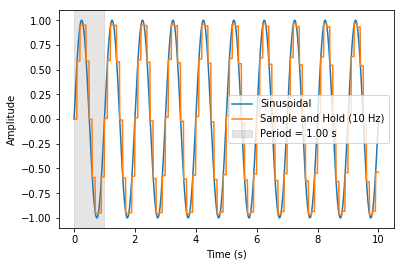

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define sample and hold function
def sample_and_hold(signal, rate):
    hold_signal = np.zeros_like(signal) # initialize hold signal
    last_sample = 0 # initialize last sample
    for i, s in enumerate(signal):
        if i % rate == 0: # sample signal at given rate
            last_sample = s
        hold_signal[i] = last_sample # hold last sample
    return hold_signal

# Define parameters
np.random.seed(1234) # set seed for reproducibility
t = np.linspace(0, 10, 1000) # time axis
freq = 1 # frequency of sinusoidal signal
rate = 10 # sample rate of sample and hold signal

# Generate signals
noise = np.random.normal(0, 1, 1000) # random noise signal
sinusoidal = np.sin(2*np.pi*freq*t)
hold_signal = sample_and_hold(sinusoidal, rate)

# Compute periods
#
# Compute the period of the sample and hold signal using numpy's diff function 
# and find the indices where the sample and hold signal changes from one sample
# to the next:
hold_diff = np.diff(hold_signal)
hold_changes = np.nonzero(hold_diff)[0] + 1 # add 1 to get the index after the change
hold_periods = np.diff(hold_changes) / rate # periods in seconds
avg_period = np.mean(hold_periods)

# Plot signals
plt.plot(t, sinusoidal, label='Sinusoidal')
plt.plot(t, hold_signal, label=f'Sample and Hold ({rate} Hz)')
plt.axvspan(0, avg_period, alpha=0.2, color='grey', label=f'Period = {avg_period:.2f} s')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
